In [2]:
%matplotlib inline

import json
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

from scipy.sparse import lil_matrix

from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances

In [3]:
data= pd.read_csv('WRData.csv')

In [4]:
data_filtered = data.set_index('PlayerName')
data_filtered.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_filtered)
    distortions.append(kmeanModel.inertia_)

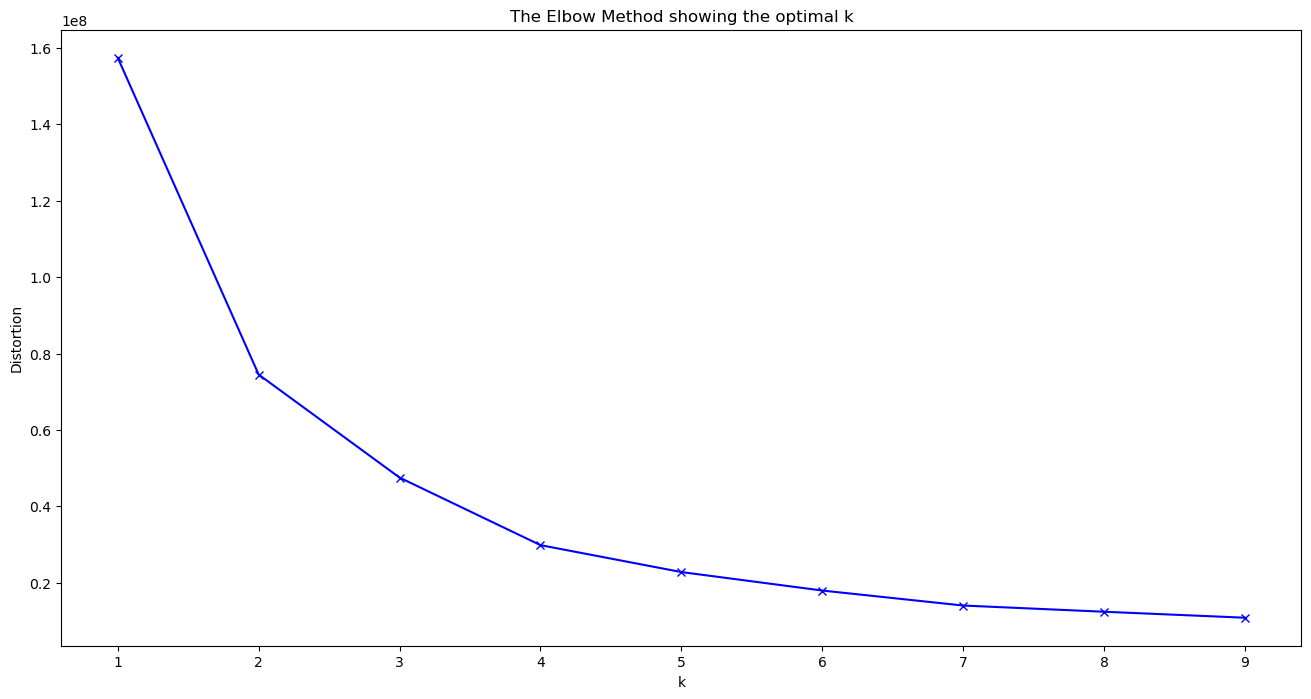

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
from sklearn.cluster import KMeans

k = 4
model = KMeans(n_clusters = k)
model.fit(data_filtered)

KMeans(n_clusters=4)

In [8]:
data_filtered["cluster"] = model.labels_

In [9]:
clustered_data = data_filtered[["cluster"]]

In [10]:
clustered_data

,cluster
PlayerName,
Justin Jefferson,3
Tyreek Hill,3
Davante Adams,3
A.J. Brown,3
Stefon Diggs,3
...,...
KhaDarel Hodge,0
Kyle Juszczyk,0
Ian Thomas,0
